# Word2Vec 

# 여성복 리뷰로 진행

# 1. CSV 파일 로드 및 워드투백 파일로 전환

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
# 파일 경로 설정
file_path = '/Users/helloworld/Desktop/TM_finalHW/Womens Clothing E-Commerce Reviews.csv'  # 'path/to/your/file.csv'를 실제 파일 경로로 교체하세요.

# CSV 파일 로드
df = pd.read_csv(file_path)

# 데이터 확인
print(df.head())  # 데이터의 첫 5행을 출력


   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [5]:
import pandas as pd
from gensim.models import Word2Vec
import gensim.utils

# 'Review Text' 컬럼에서 텍스트 데이터 선택 및 null 값 제거
text_data = df['Review Text'].dropna().tolist()

# 영문 텍스트 전처리 및 토큰화
tokenized_data = [gensim.utils.simple_preprocess(sentence) for sentence in text_data]

# Word2Vec 모델 학습
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=5, workers=4)

# 모델 저장 (.bin.gz 형식)
model.wv.save_word2vec_format('/Users/helloworld/Desktop/TM_finalHW/Womens.bin.gz', binary=True)


In [11]:
# 순서대로 1000개 문장의 토큰화된 단어들을 출력
for tokens in tokenized_data[:1000]:
    print(tokens)

['absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable']
['love', 'this', 'dress', 'it', 'sooo', 'pretty', 'happened', 'to', 'find', 'it', 'in', 'store', 'and', 'glad', 'did', 'bc', 'never', 'would', 'have', 'ordered', 'it', 'online', 'bc', 'it', 'petite', 'bought', 'petite', 'and', 'am', 'love', 'the', 'length', 'on', 'me', 'hits', 'just', 'little', 'below', 'the', 'knee', 'would', 'definitely', 'be', 'true', 'midi', 'on', 'someone', 'who', 'is', 'truly', 'petite']
['had', 'such', 'high', 'hopes', 'for', 'this', 'dress', 'and', 'really', 'wanted', 'it', 'to', 'work', 'for', 'me', 'initially', 'ordered', 'the', 'petite', 'small', 'my', 'usual', 'size', 'but', 'found', 'this', 'to', 'be', 'outrageously', 'small', 'so', 'small', 'in', 'fact', 'that', 'could', 'not', 'zip', 'it', 'up', 'reordered', 'it', 'in', 'petite', 'medium', 'which', 'was', 'just', 'ok', 'overall', 'the', 'top', 'half', 'was', 'comfortable', 'and', 'fit', 'nicely', 'but', 'the', 'bottom', 'half', 'ha

In [6]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('/Users/helloworld/Desktop/TM_finalHW/Womens.bin.gz', binary=True)

In [7]:
print(word2vec_model.vectors.shape)

(4772, 100)


In [14]:
print(word2vec_model.similarity('silky', 'sexy'))
print(word2vec_model.similarity('dress', 'long'))

0.5693613
-0.06655575


In [9]:
print(word2vec_model['sexy'])

[-0.24869192  0.4300354   0.01644316 -0.25583088 -0.42885116 -0.31774986
  0.49634874  0.40796664 -0.29904133 -0.21603876  0.26376376 -0.752568
 -0.06393386 -0.02082201 -0.17239922 -0.12502688  0.32995176  0.62257886
  0.68126184 -0.2688679   0.49074936 -0.20504409  0.30698362 -0.00190245
  0.44861546 -0.3246399   1.4043001  -0.2593977  -0.04421164  0.29706627
  0.05376783 -0.13653529 -0.3923315  -0.893832    0.5022427  -0.48209688
  0.7500736  -0.3579361   0.3902402   0.25569904  0.27607042 -0.34236374
  0.45471302  0.3792482   0.19910105 -0.55843216  0.4552977  -0.46865952
  0.1688099  -0.32209846  0.5453162  -0.18615043  0.1635513   0.35469887
  0.00997107  0.5774084  -0.4267738  -0.17437188  0.79836273  0.19258243
 -0.4383406   0.696426   -1.0067198  -0.08027987  0.00299878 -0.02946566
 -0.17757311 -0.02273415  0.13096291  0.13385998 -0.07293528  0.5655508
  0.47204486  0.3234486   0.38158888  0.12058842  0.3058409  -0.21541712
 -0.6767925   0.46659857 -0.6352543   0.2507478  -0.10

In [18]:
word2vec_model.most_similar(positive=['pants', 'jeans'], topn=5)

[('shorts', 0.8781207203865051),
 ('trousers', 0.7866421937942505),
 ('leggings', 0.7766583561897278),
 ('joggers', 0.7315831780433655),
 ('chinos', 0.7257682681083679)]

In [19]:
word2vec_model.most_similar(positive=['top', 'size'], topn=5)

[('dress', 0.6306536197662354),
 ('medium', 0.6066**********56),
 ('chest', 0.5820288062095642),
 ('sizing', 0.5752718448638916),
 ('blouse', 0.5714284181594849)]

In [21]:
word2vec_model.doesnt_match("coat warm delicious winter".split())

'delicious'

In [16]:
word2vec_model.most_similar(positive=['king', 'woman'], negative=['man'], topn=2)

[('queen', 0.7118193507194519), ('monarch', 0.6189674139022827)]

In [17]:
word2vec_model.similarity('princess', 'queen')

0.7070532

### TSNE

T-분포를 활용해서 높은 차원의 복잡한 데이터를 2차원에 차원 축소하는 방법입니다. 낮은 차원 공간의 시각화에 주로 사용하며 차원 축소할 때는 비슷한 구조끼리 데이터를 정리한 상태

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

items = ['shirt','pants','coat','dress','jacket','jeans','jumpsuits','winter','summer','fabric','leather','adorable']
item_vectors = [(item, word2vec_model[item]) for item in items if item in word2vec_model]
vectors = np.asanyarray([x[1] for x in item_vectors])

# 벡터의 수 확인
n_samples = len(vectors)
print("Number of samples:", n_samples)

# t-SNE 실행 (perplexity를 샘플 수보다 작은 값으로 설정)
tsne = TSNE(n_components=2, perplexity=min(6, n_samples-1), verbose=2).fit_transform(vectors)


Number of samples: 12
[t-SNE] Computing 11 nearest neighbors...
[t-SNE] Indexed 12 samples in 0.000s...
[t-SNE] Computed neighbors for 12 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 12 / 12
[t-SNE] Mean sigma: 5.758600
[t-SNE] Computed conditional probabilities in 0.001s
[t-SNE] Iteration 50: error = 52.7265549, gradient norm = 0.8763083 (50 iterations in 0.028s)
[t-SNE] Iteration 100: error = 50.3866348, gradient norm = 0.5113450 (50 iterations in 0.024s)
[t-SNE] Iteration 150: error = 48.5974731, gradient norm = 0.4385485 (50 iterations in 0.023s)
[t-SNE] Iteration 200: error = 54.1528397, gradient norm = 0.6180272 (50 iterations in 0.022s)
[t-SNE] Iteration 250: error = 45.3819504, gradient norm = 0.6161162 (50 iterations in 0.022s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.381950
[t-SNE] Iteration 300: error = 0.4257630, gradient norm = 0.0074044 (50 iterations in 0.022s)
[t-SNE] Iteration 350: error = 0.0947203, gradient 

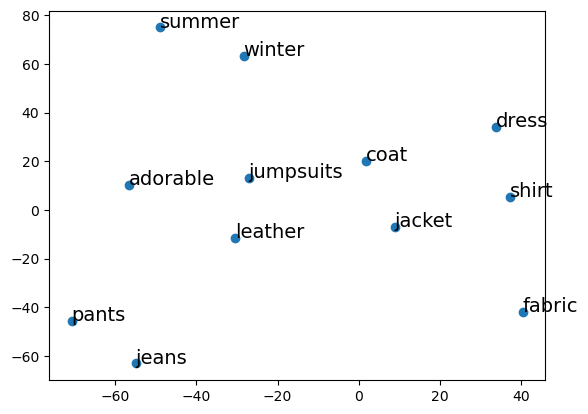

In [27]:
x = tsne[:,0]
y = tsne[:,1]
fig,ax = plt.subplots()
ax.scatter(x,y)
for item, x1, y1 in zip(item_vectors, x, y):
    ax.annotate(item[0],(x1,y1),size=14)

plt.show()

## 한국어 모델 만들기: 국민청원으로 만들어봄
다운로드 사이트 </p>
https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec

In [31]:
train_data = pd.read_json('/Users/helloworld/Desktop/TM_finalHW/public.txt', lines=True)

In [32]:
train_data[:5] # 상위 5개 출력

,category,begin,end,content,num_agree,petition_idx,status,title
0,보건복지,2018-05-01,2018-05-31,강원랜드를 폐업해 주실 것을 간곡히 부탁 드립니다. 강원랜드는 70년대에서 80년대...,1,216512,청원종료,강원랜드를 폐업해 주세요
1,육아/교육,2018-05-01,2018-05-31,"요즘 대부분 초등학생이나 중학생들은 헌법이 탄생했던 날인 제헌절이 언제인지, 심하면...",1,216513,청원종료,제헌절을 기념할 수 있게 해주세요!
2,정치개혁,2018-05-01,2018-05-31,"대한민국 헌법학자들은 정당의 해산에 대해서 이렇게 말하고 있습니다. "" 위헌정당해산...",245,216514,청원종료,자유한국당 정당해산 만이 이 나라의 살 길입니다.
3,보건복지,2018-05-01,2018-05-31,안녕하세요? 몇년전 저는 직장을 다니다가 그만두고 일을 하지 않았고 수입은 없었습니...,6,216515,청원종료,국민건강보험 수정할 사항 두가지 제안합니다.
4,외교/통일/국방,2018-05-01,2018-05-31,저는 군인자녀 입니다. 저는 군대가 정말 좋고 그 조직에 대해 긍정적인 생각도 갖고...,1390,216516,청원종료,저희 아버지를 살려주세요.....


In [35]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['content'] = train_data['content'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True)
train_data

,category,begin,end,content,num_agree,petition_idx,status,title
0,보건복지,2018-05-01,2018-05-31,강원랜드를 폐업해 주실 것을 간곡히 부탁 드립니다 강원랜드는 년대에서 년대에 걸쳐 ...,1,216512,청원종료,강원랜드를 폐업해 주세요
1,육아/교육,2018-05-01,2018-05-31,요즘 대부분 초등학생이나 중학생들은 헌법이 탄생했던 날인 제헌절이 언제인지 심하면 ...,1,216513,청원종료,제헌절을 기념할 수 있게 해주세요!
2,정치개혁,2018-05-01,2018-05-31,대한민국 헌법학자들은 정당의 해산에 대해서 이렇게 말하고 있습니다 위헌정당해산제도...,245,216514,청원종료,자유한국당 정당해산 만이 이 나라의 살 길입니다.
3,보건복지,2018-05-01,2018-05-31,안녕하세요 몇년전 저는 직장을 다니다가 그만두고 일을 하지 않았고 수입은 없었습니다...,6,216515,청원종료,국민건강보험 수정할 사항 두가지 제안합니다.
4,외교/통일/국방,2018-05-01,2018-05-31,저는 군인자녀 입니다 저는 군대가 정말 좋고 그 조직에 대해 긍정적인 생각도 갖고 ...,1390,216516,청원종료,저희 아버지를 살려주세요.....
...,...,...,...,...,...,...,...,...
25271,문화/예술/체육/언론,2018-05-31,2018-06-30,부산광역시에 있는 적폐구단 롯데자이언츠 야구단을 해체 시켜주세요 부산시민의 정신적 ...,5,257849,청원종료,롯데 자이언츠 야구단 해체 부탁드립니다
25272,안전/환경,2018-05-31,2018-06-30,전자 퓨리케어 정수기 광고를 보고 렌탈을 했습니다 모든 직수관을 교체해주고 매년 새...,5,257851,청원종료,LG전자 퓨리케어 정수기 냉수관만 갈아주고 다갈아준척!
25273,기타,2018-05-31,2018-06-30,안녕하세요 다름이 아니라 중고등학교 수업시간 분 단축에 대해 적어 보려고 합니다 현...,3,257853,청원종료,"중,고등학교 수업시간 5분씩 단축"
25274,정치개혁,2018-05-31,2018-06-30,지방할당제지역인재를 폐지해주세요 이력서에 성별가족정보학력사진 등을 기재하는 것을...,2,257854,청원종료,정의로운 사회를 위한 20가지 부탁입니다.


In [36]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

False


In [37]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [40]:
from konlpy.tag import Okt
from tqdm import tqdm

okt = Okt()

# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['content']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|█████████████████████████████████████| 25244/25244 [09:52<00:00, 42.60it/s]


청원의 최대 길이 : 21163
청원의 평균 길이 : 149.85327206464902


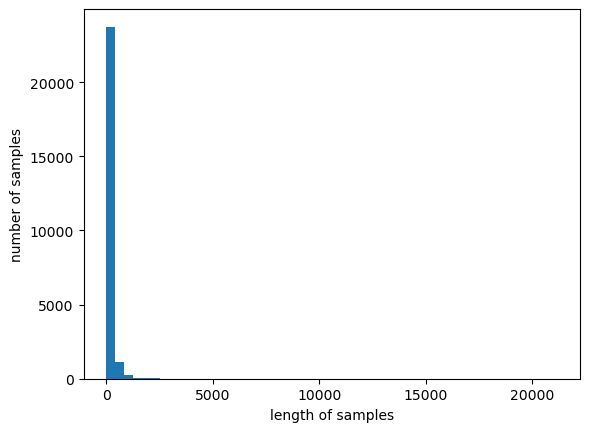

In [41]:
# 리뷰 길이 분포 확인
print('청원의 최대 길이 :',max(len(content) for content in tokenized_data))
print('청원의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(content) for content in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [42]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [43]:
print(model.wv.most_similar("군대"))

[('여자도', 0.6716263890266418), ('남자', 0.5861836075782776), ('징병', 0.5730884671211243), ('국방', 0.5654**********02), ('군복무', 0.5598986148834229), ('예비군', 0.5393922924995422), ('남성만', 0.5347954630851746), ('사병', 0.5345302820205688), ('여자', 0.5333133339881897), ('군', 0.5332649350166321)]


In [44]:
print(model.wv.most_similar("여성혐오"))

[('남성혐오', 0.8694539070129395), ('남혐', 0.8550122976303101), ('여혐', 0.833347499370575), ('혐오', 0.8116040825843811), ('일베', 0.7947389483451843), ('갈리아', 0.78971928358078), ('워마드', 0.7643787264823914), ('일간베스트', 0.7599976658821106), ('여성시대', 0.7593721151351929), ('증오', 0.7430764436721802)]
